# Extract HDF5 Image Data

**DESCRIPTION:** 

This file shows how to extract the hdf5 image data output from Powderday. Use the class `MultiBandImage` for multi-band image information and `SingleBandImage` for single-band information. A `SingleBandImage` instance is obtainable from the `MultiBandImage.filter_image` method. 

**REQUIRES:** 

numpy, matplotlib, scipy, astropy, pandas, photutils, h5py, [Pillow](https://pypi.org/project/Pillow/)

You may also need [Hyperion](http://www.hyperion-rt.org/) if you need to interact with the Powderday datacubes (via `powderdaydatacube.py`).

In [1]:
import powderdayimage  # main package

import matplotlib
matplotlib.rcParams.update({'font.size': 24})
matplotlib.rcParams.update({'axes.linewidth': 2.0})  # some styling

import pandas as pd

##### Create function to get the correct filters
Powderday scrambles the filter image data in each HDF5 image output for some reason. This must therefore be corrected for. To unscramble the data, you need a map between the correct filters and the incorrect filters. This information is stored in the `filt_map.csv` file. This is already done for my morphology CSV data files, but needs to be done in reverse when accessing the image data files. This is done with the below-defined function `old_filt(halo_str, new_filt)`, where `new_filt` is the (correct) filter name shown in the CSV files.

If you do not have `filt_map.csv` already, you will have to generate it by manually convolving the Powderday datacube (see example code in `generate_filter_map.py`). You can skip the filter remapping (not recommended unless you know that the Powderday files have the correct filters) by simply letting `new_filt = old_filt = lambda _, x: x`, instead of loading the filter map from below.

In [2]:
filt_map = pd.read_csv('filt_map.csv', index_col=0)
new_filt = lambda halo_str, old_filt: filt_map[(filt_map['halo_str'] == halo_str) & (filt_map['old'] == old_filt)]['new'].iloc[0]
old_filt = lambda halo_str, new_filt: filt_map[(filt_map['halo_str'] == halo_str) & (filt_map['new'] == new_filt)]['old'].iloc[0]

## Load A Halo

In [3]:
filename = "Image_Data/convolved.5271_4_1.hdf5" # investigate a given powderday image output file 

In [4]:
# load the whole image (all filters)
image = powderdayimage.MultiBandImage(filename)
image.filters

['castor_uv_low_rez.filter',
 'roman_F146_low_rez.filter',
 'castor_g_low_rez.filter']

In [5]:
# get the luminosity image data for a given filter (ergs/s)
g_filter = old_filt('5271_4_1', 'castor_g_low_rez.filter')
imageG = image.filter_image(g_filter)  # a SingleBandImage object 
imageG_data = imageG.data  # get the matrix associated to this object

print(imageG_data.shape)
print(imageG_data)

(100, 100)
[[1.83103732e+38 1.90511168e+39 9.67189370e+38 ... 8.31372047e+37
  3.03421210e+38 2.08461833e+38]
 [1.07122849e+39 2.79114543e+38 4.62564051e+38 ... 2.40077773e+38
  3.02269633e+38 1.23654842e+38]
 [2.68725236e+38 1.38779028e+38 2.63374510e+38 ... 8.73282367e+37
  2.31724313e+38 3.12730056e+38]
 ...
 [1.80606405e+38 1.72548917e+38 1.36393964e+38 ... 2.02779541e+38
  3.61747071e+38 7.24276805e+38]
 [6.28952155e+38 3.15014770e+38 6.47746666e+38 ... 1.24434235e+38
  1.59187343e+38 3.83893900e+38]
 [2.61056475e+38 1.18035233e+38 2.05243330e+38 ... 1.65449427e+38
  8.79775480e+38 6.83480681e+38]]


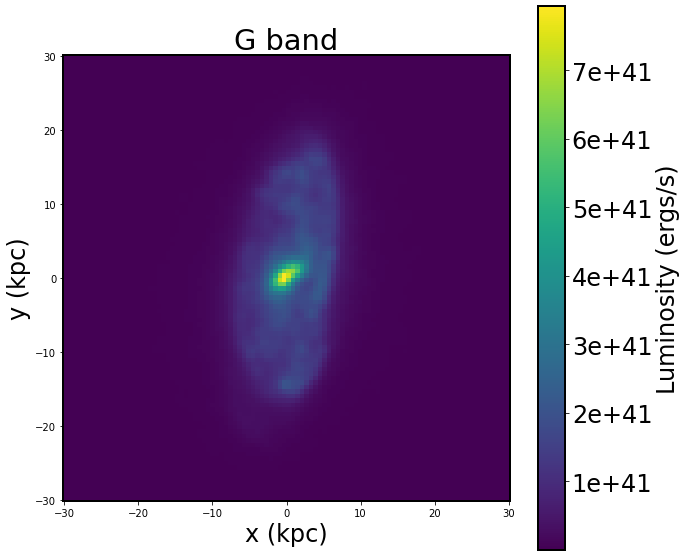

In [6]:
# plot the image in that filter band
imageG.plot_image(title='G band', psf_fwhm=2.0)  # convolved with 2 pixel PSF

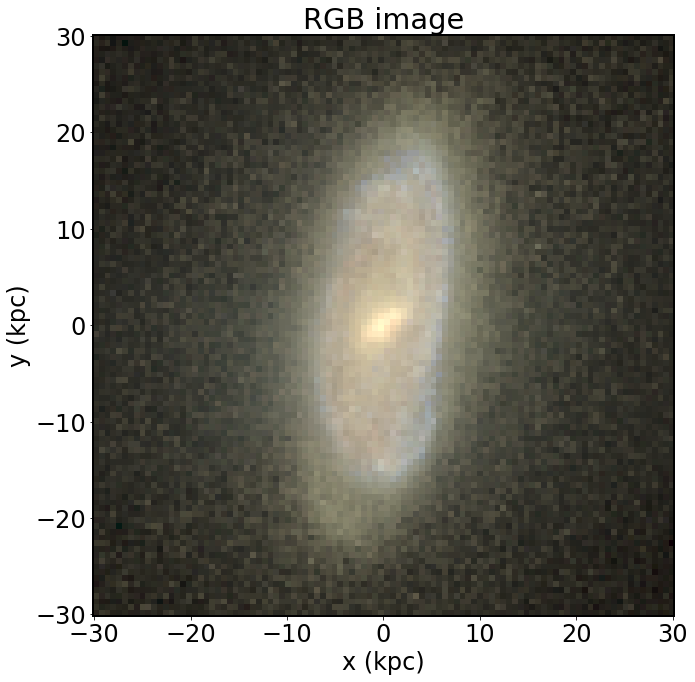

In [7]:
# plot mock RGB image (see function parameters to adjust various image properties)
image.plot_rgb(old_filt('5271_4_1', 'roman_F146_low_rez.filter'),     # R filter
               old_filt('5271_4_1', 'castor_g_low_rez.filter'),       # G filter
               old_filt('5271_4_1', 'castor_uv_low_rez.filter'))      # B filter